# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [3]:
df = rcr('adult.csv')
p(df)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
pd.options.display.max_info_columns = 999
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


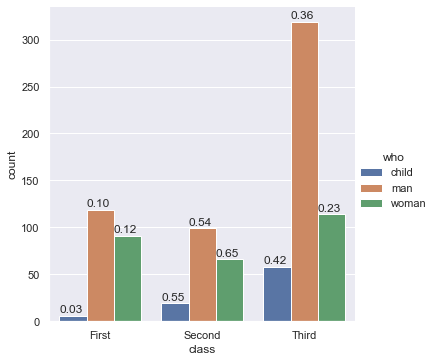

In [16]:
import seaborn as sns
from itertools import product

titanic = sns.load_dataset("titanic")

class_order = ['First','Second','Third'] 
hue_order = ['child', 'man', 'woman']
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=titanic, kind='count', 
                   x='class', hue='who',
                   order = class_order, 
                   hue_order = hue_order )

# As long as we haven't plotted anything else into this axis,
# we know the rectangles in it are our barplot bars
# and we know the order, so we can match up graphic and calculations:

spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    class_total = len(titanic[titanic['class']==spot[1][0]])
    class_who_total = len(titanic[(titanic['class']==spot[1][0]) & 
        (titanic['who']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(class_who_total/class_total))

    #checking the patch order, not for final:
    #catp.ax.text(spot[0].get_x(), -3, spot[1][0][0]+spot[1][1][0])

In [19]:
list(df.race.unique())

['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

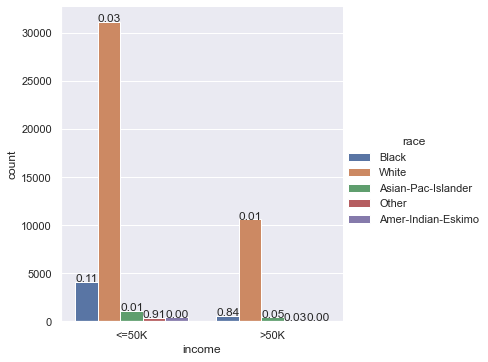

In [21]:
import seaborn as sns
from itertools import product

titanic = df

class_order = ['<=50K', '>50K'] 
hue_order = list(df.race.unique())
bar_order = product(class_order, hue_order)

catp = sns.catplot(data=titanic, kind='count', 
                   x='income', hue='race',
                   order = class_order, 
                   hue_order = hue_order )

# As long as we haven't plotted anything else into this axis,
# we know the rectangles in it are our barplot bars
# and we know the order, so we can match up graphic and calculations:

spots = zip(catp.ax.patches, bar_order)
for spot in spots:
    class_total = len(titanic[titanic['income']==spot[1][0]])
    class_who_total = len(titanic[(titanic['income']==spot[1][0]) & 
        (titanic['race']==spot[1][1])])
    height = spot[0].get_height() 
    catp.ax.text(spot[0].get_x(), height+3, '{:1.2f}'.format(class_who_total/class_total))

    #checking the patch order, not for final:
    #catp.ax.text(spot[0].get_x(), -3, spot[1][0][0]+spot[1][1][0])

In [32]:
new_df = df.groupby('race')['income'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

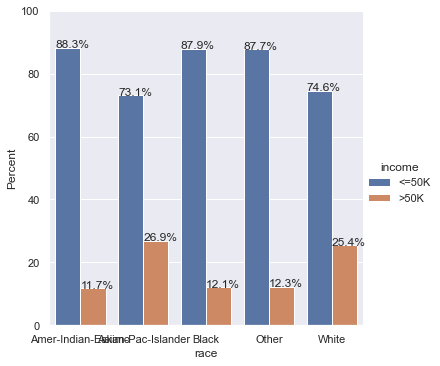

In [37]:
g = sns.catplot(x='race', y='Percent', hue='income', kind='bar', data=new_df)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt)

## 3.6 Summary<a id='3.6_Summary'></a>